## WORKGROUP 4

Integrantes: 
- Valeria Hoyos Macedo
- Josué Eduardo Maguiña Mezaz
- Alvaro Alexander Yllu Socualaya
- Maria pamela Cubas Albujar

## Bootstraping


### Loading libraries

In [31]:
library(dplyr)
library(readr)
library(boot)
library(tibble)


### Loading dat form URL

In [32]:
data <- read_csv("https://raw.githubusercontent.com/alexanderquispe/CausalAI-Course/1b3b3368927b48ea4c9a13dc239b4665c938c838/data/penn_jae.csv")

New names:
• `` -> `...1`
Rows: 13913 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (24): ...1, abdt, tg, inuidur1, inuidur2, female, black, hispanic, othra...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Filter data to include only observation where tg=0 or tg=4 and create T4

In [64]:
n_data <- data %>% filter(tg == 0 | tg == 4)
n_data <- n_data %>% mutate(T4 = as.integer(tg == 4))
n_data

...1,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,⋯,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld,T4
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,10824,0,18,18,0,0,0,0,2,⋯,0,0,0,0,0,0,0,1,0,0
4,10824,0,1,1,0,0,0,0,0,⋯,0,0,0,0,0,0,1,0,0,0
5,10747,0,27,27,0,0,0,0,0,⋯,0,0,0,0,0,0,1,0,0,0
12,10607,4,9,9,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,1,1
13,10831,0,27,27,0,0,0,0,1,⋯,0,0,0,1,1,0,1,0,0,0
14,10845,0,27,27,1,0,0,0,0,⋯,0,0,0,1,0,0,1,0,0,0
15,10831,0,9,9,1,0,0,0,1,⋯,0,0,0,1,0,0,1,0,0,0
17,10859,0,27,27,1,0,0,0,1,⋯,1,0,0,0,0,0,1,0,0,0
23,10516,0,15,15,1,0,0,0,0,⋯,0,0,0,0,0,0,1,0,0,0


### Define dependent and independent variable

In [65]:
dependent_var <- log(n_data$inuidur1)
independent_vars <- c('T4', 'female', 'black', 'othrace', 'dep',
                      'q2', 'q3', 'q4', 'q5', 'q6', 'agelt35', 'agegt54',
                      'durable', 'lusd', 'husd')


### Create the OLS formula

In [66]:
model_formula <- as.formula(paste("dependent_var ~", paste(independent_vars, collapse = " + ")))
model_formula

dependent_var ~ T4 + female + black + othrace + dep + q2 + q3 + 
    q4 + q5 + q6 + agelt35 + agegt54 + durable + lusd + husd

### Fit the initial model

In [67]:
model <- lm(model_formula, data = n_data)
summary(model)


Call:
lm(formula = model_formula, data = n_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6195 -0.9966  0.3133  1.0400  2.0883 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.178441   0.159001  13.701  < 2e-16 ***
T4          -0.071659   0.035460  -2.021 0.043349 *  
female       0.125810   0.034780   3.617 0.000301 ***
black       -0.293971   0.052967  -5.550 3.00e-08 ***
othrace     -0.470387   0.198281  -2.372 0.017713 *  
dep          0.045993   0.022535   2.041 0.041308 *  
q2           0.073251   0.156807   0.467 0.640420    
q3          -0.039092   0.156454  -0.250 0.802704    
q4          -0.055596   0.156534  -0.355 0.722478    
q5          -0.144996   0.155854  -0.930 0.352243    
q6           0.003035   0.166438   0.018 0.985453    
agelt35     -0.162642   0.036960  -4.401 1.10e-05 ***
agegt54      0.227801   0.058892   3.868 0.000111 ***
durable      0.126551   0.048142   2.629 0.008597 ** 
lusd        -0.175602   0.04097

### Save the results from the original model

In [69]:
og_results <- tibble(
  Variable = c('T4', 'female', 'black'),
  Estimate = coef(model)[c('T4', 'female', 'black')],
  `Std. Error` = summary(model)$coefficients[c('T4', 'female', 'black'), 'Std. Error']
)

### Create bootstrapping function

In [74]:
boot_fn <- function(data, index)
 coef(model_formula,n_data,subset= index))

###Iterate the bootstrapping 1000 times

In [81]:
set.seed(1)
results <- boot(n_data,boot_fn, R = 1000)
results


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = n_data, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
         original        bias    std. error
t1*   2.178440628  1.232648e-03  0.15443488
t2*  -0.071658908 -4.025497e-04  0.03557617
t3*   0.125810490  8.623276e-04  0.03523702
t4*  -0.293970722  5.426950e-04  0.06036912
t5*  -0.470387346 -5.598168e-03  0.24319471
t6*   0.045993486 -4.154231e-04  0.02208736
t7*   0.073250572 -1.135168e-03  0.15207547
t8*  -0.039092037 -4.110129e-04  0.14976631
t9*  -0.055596066 -8.839347e-04  0.15078820
t10* -0.144996201 -1.589444e-03  0.14980279
t11*  0.003034724 -3.793215e-03  0.16119971
t12* -0.162642268  1.750767e-03  0.03820420
t13*  0.227801007  3.562052e-04  0.05779681
t14*  0.126550597  5.074714e-05  0.04853301
t15* -0.175602274 -6.350185e-04  0.04096166
t16* -0.105557232 -7.278585e-04  0.04516640

### Saving the results of the bootstrap

In [101]:
mean_t4 <- mean(results$t[, 2])
mean_female <- mean(results$t[, 3])
mean_black <- mean(results$t[, 4])

In [102]:
se_t4 <- sd(results$t[, 2])
se_female <- sd(results$t[, 3])
se_black <- sd(results$t[, 4])

In [103]:
boot_results <- tibble(
  Variable = c('t4', 'female', 'black'),
  `Bootstrap Estimate` = c(mean_t4, mean_female, mean_black),
  `Bootstrap Std. Error` = c(se_t4, se_female, se_black)
)


In [104]:
print("Original Model Results")
print(og_results)
print("\nBootstrap Results")
print(boot_results)

[1] "Original Model Results"
# A tibble: 3 × 3
  Variable Estimate `Std. Error`
  <chr>       <dbl>        <dbl>
1 T4        -0.0717       0.0355
2 female     0.126        0.0348
3 black     -0.294        0.0530
[1] "\nBootstrap Results"
# A tibble: 3 × 3
  Variable `Bootstrap Estimate` `Bootstrap Std. Error`
  <chr>                   <dbl>                  <dbl>
1 t4                    -0.0721                 0.0356
2 female                 0.127                  0.0352
3 black                 -0.293                  0.0604


# Preg. 2

In [ ]:
#install.packages("grf")
#install.packages("Hmisc")

####  How the tree was built? 
This code uses the grf package in R to estimate causal effects by constructing a causal tree. First, the data is loaded and prepared, converting categorical variables into factors and creating dummy variables. Then, regression forests are fitted to predict the outcome (Y) and treatment (W) variables, considering the cluster structure (schools) and ensuring equal weights for each cluster. With these predictions (Y.hat and W.hat), an initial causal forest is constructed to calculate variable importance. Only variables with above-average importance are selected to build the final causal forest, tuning all parameters. Finally, treatment effect predictions (tau.hat) are obtained from the fine-tuned causal tree. 


In [38]:
set.seed(1)

rm(list = ls())

library(grf)
if(packageVersion("grf") < '0.10.2') {
  warning("This script requires grf 0.10.2 or higher")
}
library(sandwich)
library(lmtest)
library(Hmisc)
library(ggplot2)

data.all = read.csv("synthetic_data.csv")
data.all$schoolid = factor(data.all$schoolid)

DF = data.all[,-1]
school.id = as.numeric(data.all$schoolid)

school.mat = model.matrix(~ schoolid + 0, data = data.all)
school.size = colSums(school.mat)

# It appears that school ID does not affect pscore. So ignore it
# in modeling, and just treat it as source of per-cluster error.
w.lm = glm(Z ~ ., data = data.all[,-3], family = binomial)
summary(w.lm)


W = DF$Z
Y = DF$Y
X.raw = DF[,-(1:2)]

C1.exp = model.matrix(~ factor(X.raw$C1) + 0)
XC.exp = model.matrix(~ factor(X.raw$XC) + 0)

X = cbind(X.raw[,-which(names(X.raw) %in% c("C1", "XC"))], C1.exp, XC.exp)

# Grow a forest. Add extra trees for the causal forest.
Y.forest = regression_forest(X, Y, clusters = school.id, equalize.cluster.weights = TRUE)
Y.hat = predict(Y.forest)$predictions
W.forest = regression_forest(X, W, clusters = school.id, equalize.cluster.weights = TRUE)
W.hat = predict(W.forest)$predictions

cf.raw = causal_forest(X, Y, W,
                       Y.hat = Y.hat, W.hat = W.hat,
                       clusters = school.id,
                       equalize.cluster.weights = TRUE)
varimp = variable_importance(cf.raw)
selected.idx = which(varimp > mean(varimp))

cf = causal_forest(X[,selected.idx], Y, W,
                   Y.hat = Y.hat, W.hat = W.hat,
                   clusters = school.id,
                   equalize.cluster.weights = TRUE,
                   tune.parameters = "all")
tau.hat = predict(cf)$predictions




Call:
glm(formula = Z ~ ., family = binomial, data = data.all[, -3])

Coefficients: (6 not defined because of singularities)
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.9524636  0.2845173  -3.348 0.000815 ***
schoolid2    0.0697302  0.2766287   0.252 0.800986    
schoolid3    0.0382080  0.2911323   0.131 0.895586    
schoolid4    0.1761334  0.2784711   0.633 0.527059    
schoolid5   -0.0033389  0.2950180  -0.011 0.990970    
schoolid6    0.0583548  0.3067481   0.190 0.849124    
schoolid7   -0.1313759  0.3188190  -0.412 0.680288    
schoolid8    0.1233661  0.3023736   0.408 0.683279    
schoolid9   -0.1955428  0.3073344  -0.636 0.524611    
schoolid10  -0.1892794  0.2968750  -0.638 0.523752    
schoolid11  -0.2224060  0.5461005  -0.407 0.683816    
schoolid12  -0.3312420  0.5414374  -0.612 0.540682    
schoolid13  -0.0408540  0.3989507  -0.102 0.918436    
schoolid14  -0.8681934  0.6033674  -1.439 0.150175    
schoolid15  -0.1059135  0.3263162  -0.325 0.74550

#### Estimate ATE

In [39]:
ATE = average_treatment_effect(cf)
paste("95% CI for the ATE:", round(ATE[1], 3),
      "+/-", round(qnorm(0.975) * ATE[2], 3))

[1] "95% CI for the ATE: 0.248 +/- 0.04"

With the tuned parameters, we estimate the average treatment effect (ATE) that is 0.226 and has a confidence interval (+/-0.0485) with a 95/% confidence. This means that the effect of the treatment or the intervetion related to the growth mind set had a positive and significant impact on the measure of achievement of the students on average.

### Run best linear predictor analysis



Best linear fit using forest predictions (on held-out data)
as well as the mean forest prediction as regressors, along
with one-sided heteroskedasticity-robust (HC3) SEs:

                               Estimate Std. Error t value Pr(>t)    
mean.forest.prediction         0.992560   0.082569 12.0210 <2e-16 ***
differential.forest.prediction 0.275835   0.616262  0.4476 0.3272    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


[1] "95% CI for difference in ATE: 0.037 +/- 0.073"


	Welch Two Sample t-test

data:  school.score[high.X1] and school.score[!high.X1]
t = -3.0796, df = 71.402, p-value = 0.002942
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.19481996 -0.04169622
sample estimates:
mean of x mean of y 
0.1885602 0.3068183 



	Welch Two Sample t-test

data:  school.score[high.X2] and school.score[!high.X2]
t = 1.0011, df = 72.229, p-value = 0.3201
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.04020131  0.12131665
sample estimates:
mean of x mean of y 
0.2679681 0.2274105 


                 Df Sum Sq Mean Sq F value Pr(>F)
school.X2.levels  2  0.085 0.04251   1.377  0.259
Residuals        73  2.254 0.03088               


	One Sample t-test

data:  school.score.XS3.high - school.score.XS3.low
t = 2.2544, df = 75, p-value = 0.02709
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.0100095 0.1620529
sample estimates:
 mean of x 
0.08603122 


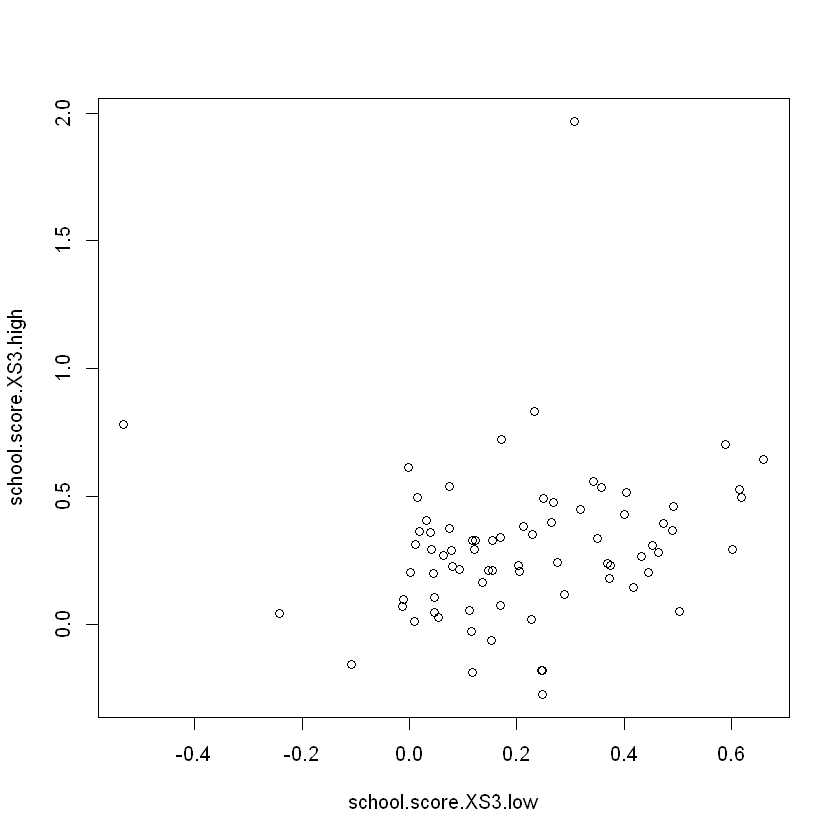

In [40]:
# Run best linear predictor analysis
test_calibration(cf)

# Compare regions with high and low estimated CATEs
high_effect = tau.hat > median(tau.hat)
ate.high = average_treatment_effect(cf, subset = high_effect)
ate.low = average_treatment_effect(cf, subset = !high_effect)
paste("95% CI for difference in ATE:",
      round(ate.high[1] - ate.low[1], 3), "+/-",
      round(qnorm(0.975) * sqrt(ate.high[2]^2 + ate.low[2]^2), 3))


#
# formal test for X1 and X2
#

dr.score = tau.hat + W / cf$W.hat *
  (Y - cf$Y.hat - (1 - cf$W.hat) * tau.hat) -
  (1 - W) / (1 - cf$W.hat) * (Y - cf$Y.hat + cf$W.hat * tau.hat)
school.score = t(school.mat) %*% dr.score / school.size

school.X1 = t(school.mat) %*% X$X1 / school.size
high.X1 = school.X1 > median(school.X1)
t.test(school.score[high.X1], school.score[!high.X1])

school.X2 = (t(school.mat) %*% X$X2) / school.size
high.X2 = school.X2 > median(school.X2)
t.test(school.score[high.X2], school.score[!high.X2])

school.X2.levels = cut(school.X2,
  breaks = c(-Inf, quantile(school.X2, c(1/3, 2/3)), Inf))
summary(aov(school.score ~ school.X2.levels))

#
# formal test for S3
#

school.score.XS3.high = t(school.mat) %*% (dr.score * (X$S3 >= 6)) /
  t(school.mat) %*% (X$S3 >= 6)
school.score.XS3.low = t(school.mat) %*% (dr.score * (X$S3 < 6)) /
  t(school.mat) %*% (X$S3 < 6)

plot(school.score.XS3.low, school.score.XS3.high)
t.test(school.score.XS3.high - school.score.XS3.low)

It finds that if we insists in cluster-robust inference, there's almost no treatment heterogenity present and thus that the causal forest couldn't identify subgroups with effects at stand.

Due to this, they try to found if there's heterogenity between two specific variables: pre-existing mindset and school-level achievement. They find that schools with larger values of pre-existing mindset have larger effects than schools with smaller values of this variables. However, they do not see much heterogeneity along school-level achievement.

### Look at school-wise heterogeneity


[1] "0.248 +/- 0.04"


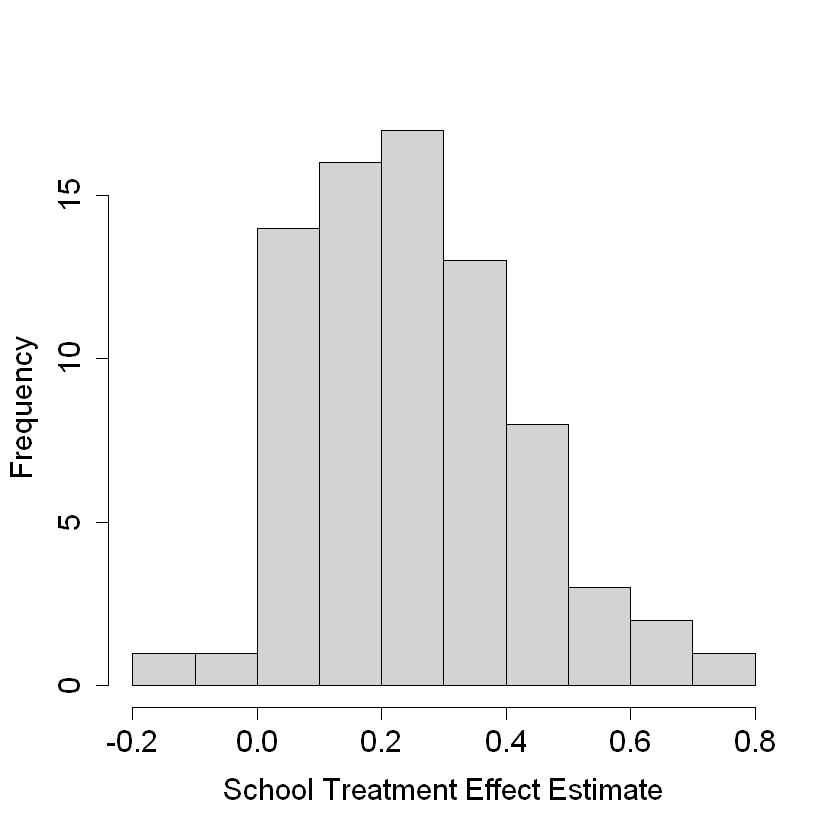

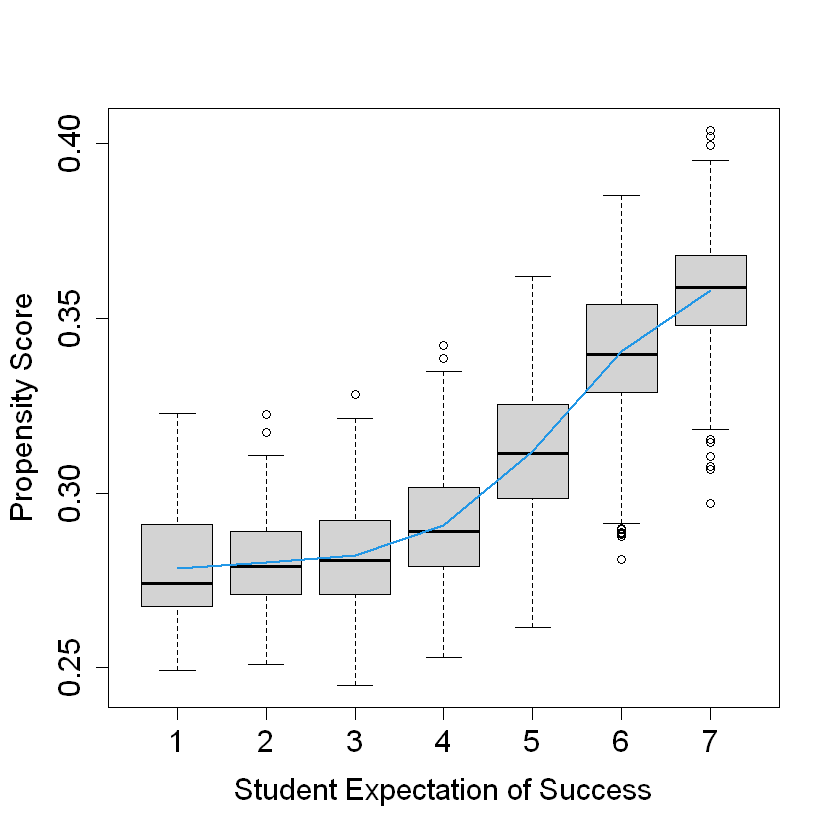

In [43]:
# Look at school-wise heterogeneity
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
hist(school.score, xlab = "School Treatment Effect Estimate", main = "")

# Re-check ATE... sanity check only
ate.hat = mean(school.score)
se.hat = sqrt(var(school.score) / length(school.score - 1))
print(paste(round(ate.hat, 3), "+/-", round(1.96 * se.hat, 3)))

# Look at variation in propensity scores
DF = X
DF$W.hat = cf$W.hat

pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
boxplot(W.hat ~ S3, data = DF, ylab = "Propensity Score", xlab = "Student Expectation of Success")
lines(smooth.spline(X$S3, cf$W.hat), lwd = 2, col = 4)

As seen before, there's much perceivable heterogenety at school-level. In order to see if this help us to identify heteregenous effects, we fit models using only school-level covariates. This fact seems to be presented on the next graphs, where the distribution of the school treatment effects and the student expectation success propensity score are shown



### Analysis ignoring clusters. How do the results change?


[1] "95% CI for the ATE: 0.253 +/- 0.022"


Best linear fit using forest predictions (on held-out data)
as well as the mean forest prediction as regressors, along
with one-sided heteroskedasticity-robust (HC3) SEs:

                               Estimate Std. Error t value    Pr(>t)    
mean.forest.prediction         1.013601   0.045216 22.4171 < 2.2e-16 ***
differential.forest.prediction 0.528143   0.121994  4.3292 7.551e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


[1] 1
[1] 2
[1] 3
[1] 4
[1] 5



Best linear fit using forest predictions (on held-out data)
as well as the mean forest prediction as regressors, along
with one-sided heteroskedasticity-robust (HC3) SEs:

                               Estimate Std. Error t value  Pr(>t)    
mean.forest.prediction         1.008590   0.065529 15.3914 < 2e-16 ***
differential.forest.prediction 0.381997   0.233055  1.6391 0.05061 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


[1] -2.042824e-05  2.515531e-04

                     Df Sum Sq Mean Sq F value  Pr(>F)    
factor(school.id)    75    203   2.708   1.999 7.3e-07 ***
Residuals         10315  13972   1.355                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

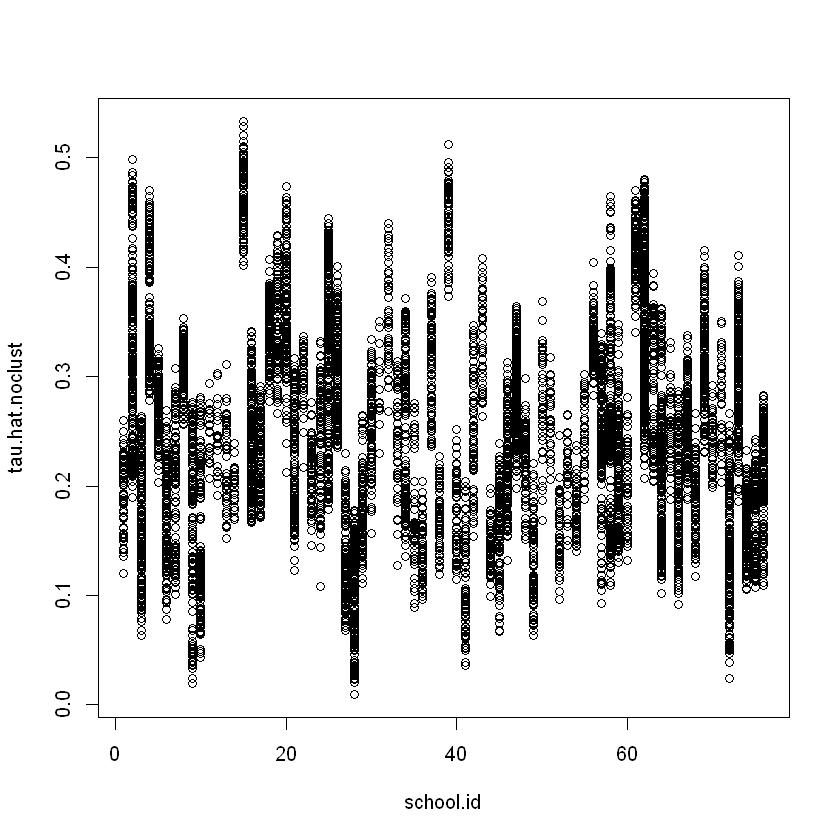

In [44]:

cf.noclust = causal_forest(X[,selected.idx], Y, W,
                           Y.hat = Y.hat, W.hat = W.hat,
                           tune.parameters = "all")

ATE.noclust = average_treatment_effect(cf.noclust)
paste("95% CI for the ATE:", round(ATE.noclust[1], 3),
      "+/-", round(qnorm(0.975) * ATE.noclust[2], 3))

test_calibration(cf.noclust)

tau.hat.noclust = predict(cf.noclust)$predict
plot(school.id, tau.hat.noclust)

nfold = 5
school.levels = unique(school.id)
cluster.folds = sample.int(nfold, length(school.levels), replace = TRUE)

tau.hat.crossfold = rep(NA, length(Y))
for (foldid in 1:nfold) {
  print(foldid)
  infold = school.id %in% school.levels[cluster.folds == foldid]
  cf.fold = causal_forest(X[!infold, selected.idx], Y[!infold], W[!infold],
                          Y.hat = Y.hat[!infold], W.hat = W.hat[!infold],
                          tune.parameters = "all")
  pred.fold = predict(cf.fold, X[infold, selected.idx])$predictions
  tau.hat.crossfold[infold] = pred.fold
}

cf.noclust.cpy = cf.noclust
cf.noclust.cpy$predictions = tau.hat.crossfold
cf.noclust.cpy$clusters = school.id
test_calibration(cf.noclust.cpy)

Rloss = mean(((Y - Y.hat) - tau.hat * (W - W.hat))^2)
Rloss.noclust = mean(((Y - Y.hat) - tau.hat.noclust * (W - W.hat))^2)
Rloss.crossfold = mean(((Y - Y.hat) - tau.hat.crossfold * (W - W.hat))^2)

c(Rloss.noclust - Rloss, Rloss.crossfold - Rloss)

summary(aov(dr.score ~ factor(school.id)))

We have seen until now no evidence on heteregenious effects of the treatment considering clusters. This mean we have token into account the possible correlation between students that attend the same school. Althought it will be naive to be believed that this doesn't happend, it will helpful to analyse whether there exist consistent difference

### Analysis without fitting the propensity score

[1] "95% CI for the ATE: 0.254 +/- 0.038"

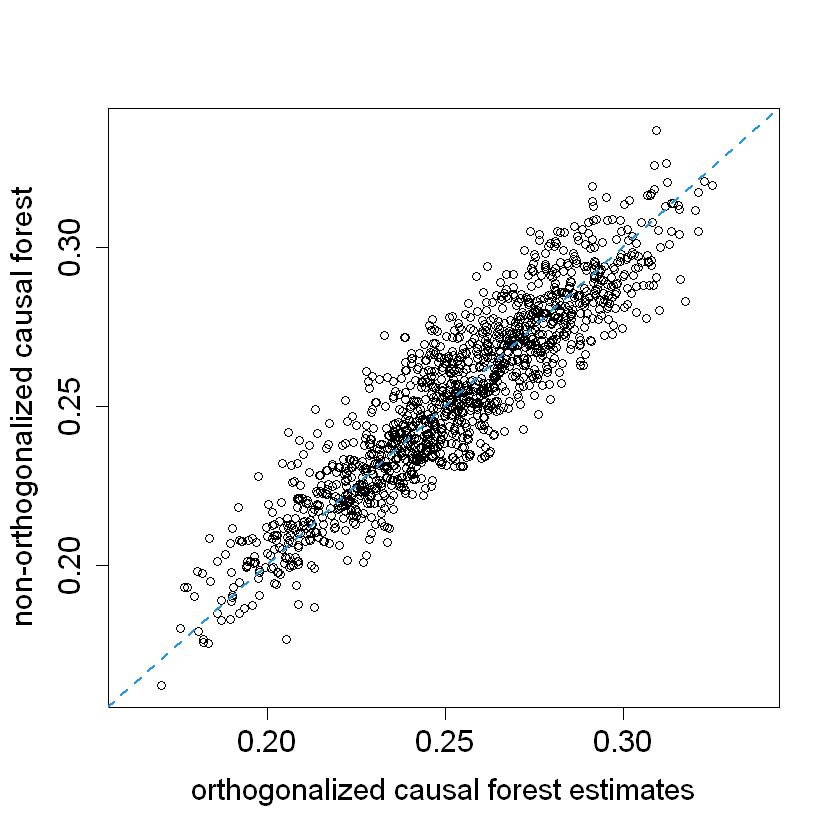

In [45]:

cf.noprop = causal_forest(X[,selected.idx], Y, W,
                          Y.hat = Y.hat, W.hat = mean(W),
                          tune.parameters = "all",
                          equalize.cluster.weights = TRUE,
                          clusters = school.id)
tau.hat.noprop = predict(cf.noprop)$predictions

ATE.noprop = average_treatment_effect(cf.noprop)
paste("95% CI for the ATE:", round(ATE.noprop[1], 3),
      "+/-", round(qnorm(0.975) * ATE.noprop[2], 3))

pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
plot(tau.hat, tau.hat.noprop,
     xlim = range(tau.hat, tau.hat.noprop),
     ylim = range(tau.hat, tau.hat.noprop),
     xlab = "orthogonalized causal forest estimates",
     ylab = "non-orthogonalized causal forest")
abline(0, 1, lwd = 2, lty = 2, col = 4)
par = pardef


We see that propensity score is not as important to the results found as clsutering was since it appers to be that the ATE found (0.254) is very much similar to the one found using orthogalization. As we can see in the followin figure, the overlaped distribution are almost the same because they are really close to the 45 degree line that means equiality between the two variables (that are the estimates).

### The code plot six plots in the Make some plots section, so explain what you find there.


Best linear fit using forest predictions (on held-out data)
as well as the mean forest prediction as regressors, along
with one-sided heteroskedasticity-robust (HC3) SEs:

                               Estimate Std. Error t value Pr(>t)    
mean.forest.prediction         1.001136   0.082595 12.1210 <2e-16 ***
differential.forest.prediction 0.818609   0.653020  1.2536  0.107    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



t test of coefficients:

               Estimate  Std. Error t value Pr(>|t|)   
(Intercept)  0.24079581  0.07773953  3.0975 0.002866 **
X1          -0.04959039  0.02966052 -1.6719 0.099273 . 
X2           0.01412785  0.03388522  0.4169 0.678081   
X3           0.00939179  0.02683438  0.3500 0.727460   
X4           0.02372228  0.02555013  0.9285 0.356552   
X5          -0.03526586  0.02708329 -1.3021 0.197399   
XC.1         0.00090015  0.09453655  0.0095 0.992432   
XC.2         0.08582749  0.10582788  0.8110 0.420275   
XC.3        -0.13553694  0.08823978 -1.5360 0.129317   
XC.4         0.04492317  0.08222504  0.5463 0.586672   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


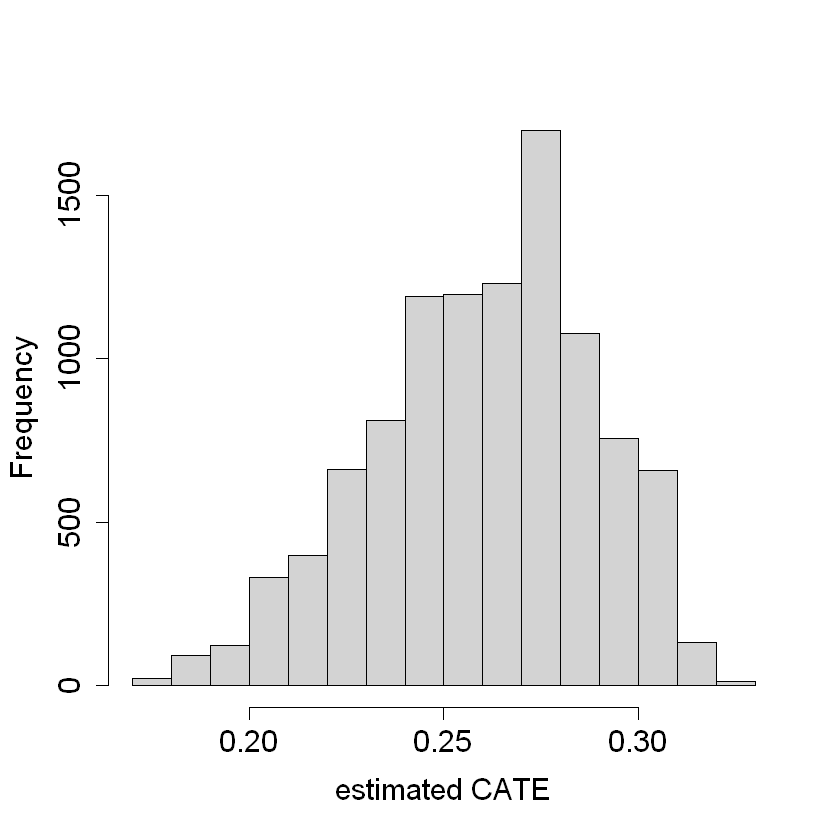

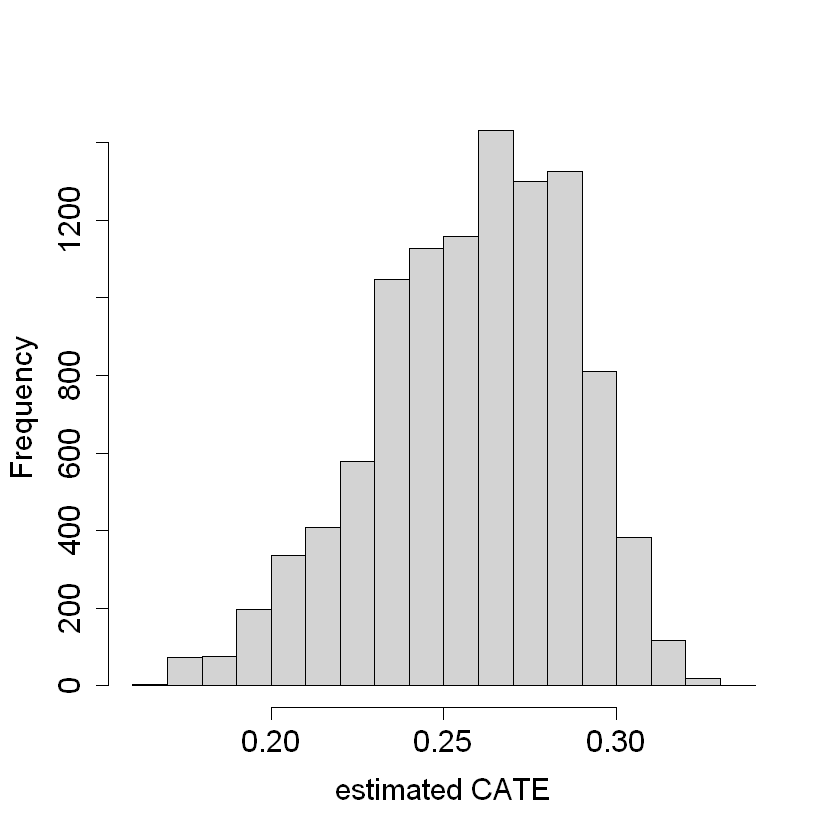

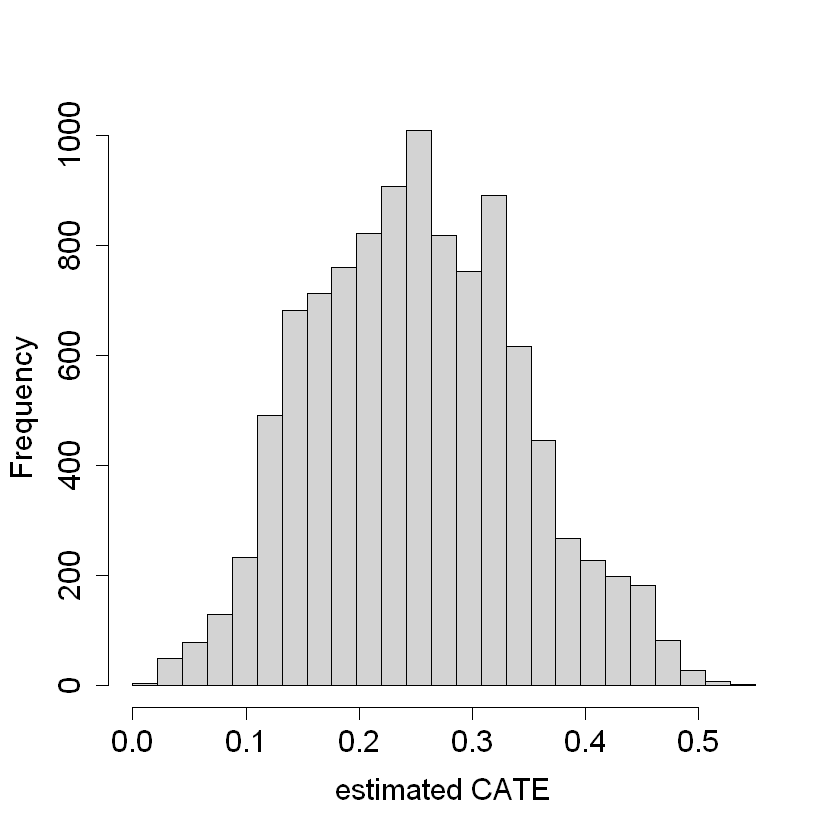

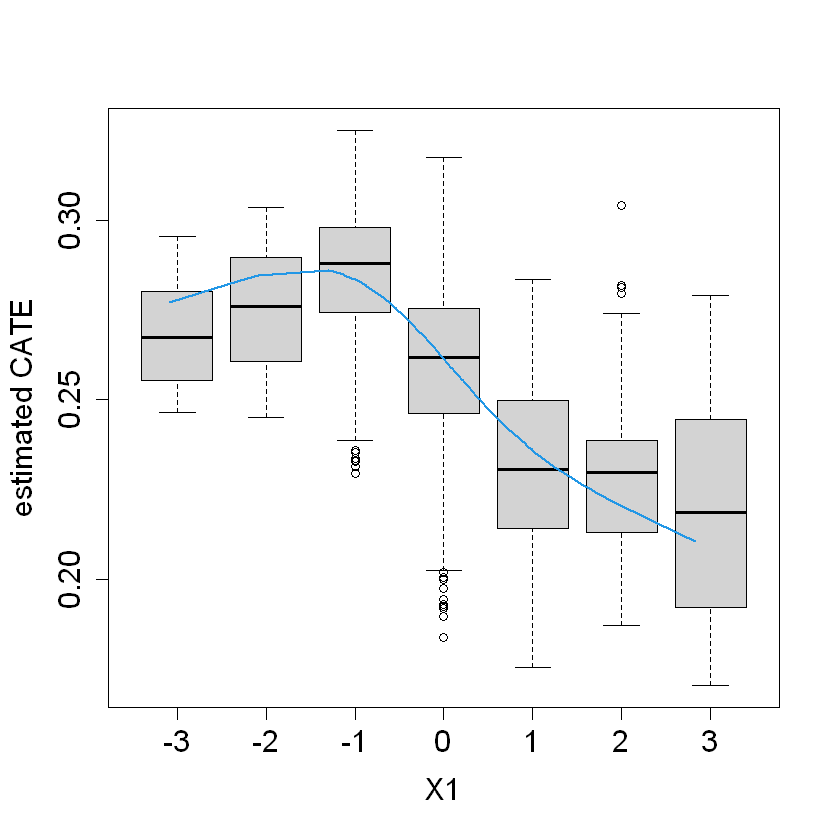

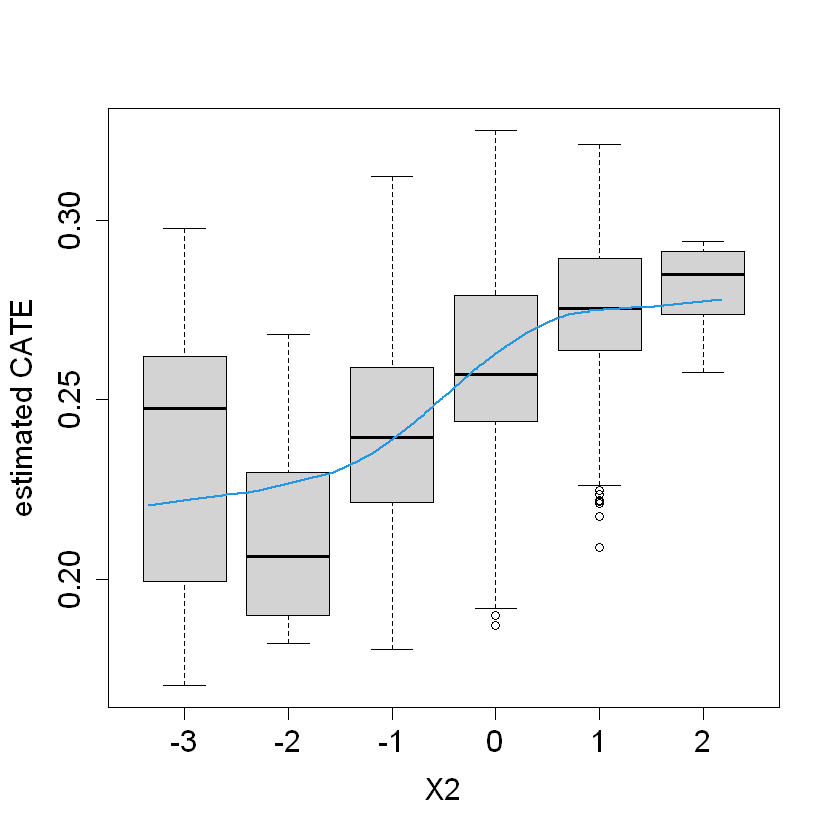

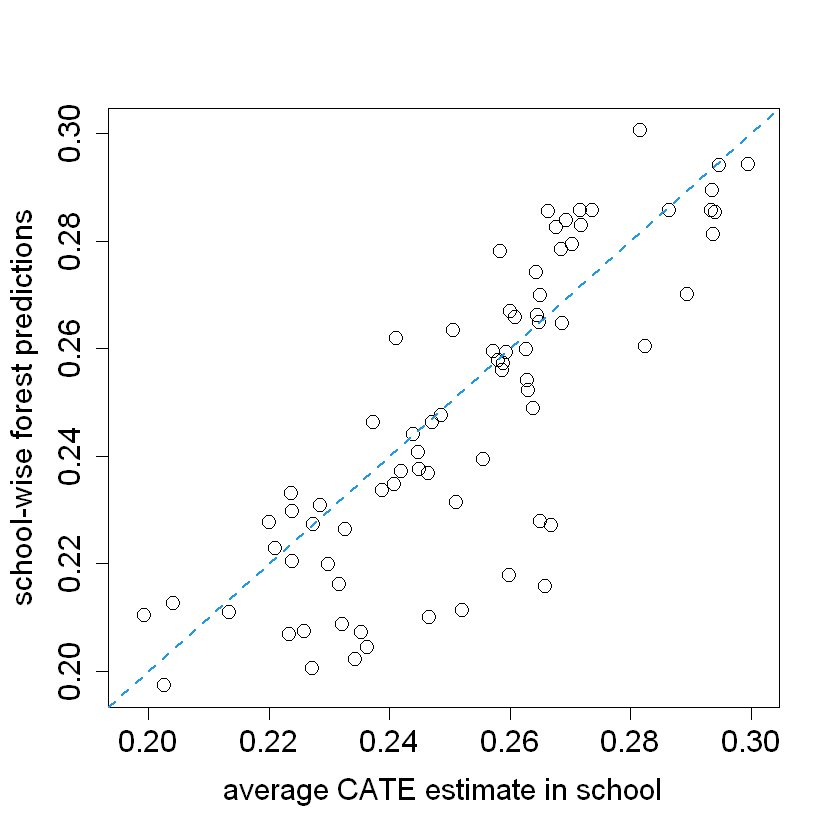

In [46]:
# Train forest on school-wise DR scores
#

school.X = (t(school.mat) %*% as.matrix(X[,c(4:8, 25:28)])) / school.size
school.X = data.frame(school.X)
colnames(school.X) = c("X1", "X2", "X3", "X4", "X5",
                    "XC.1", "XC.2", "XC.3", "XC.4")

dr.score = tau.hat + W / cf$W.hat * (Y - cf$Y.hat - (1 - cf$W.hat) * tau.hat) -
  (1 - W) / (1 - cf$W.hat) * (Y - cf$Y.hat + cf$W.hat * tau.hat)
school.score = t(school.mat) %*% dr.score / school.size

school.forest = regression_forest(school.X, school.score)
school.pred = predict(school.forest)$predictions
test_calibration(school.forest)


# Alternative OLS analysis
school.DF = data.frame(school.X, school.score=school.score)
coeftest(lm(school.score ~ ., data = school.DF), vcov = vcovHC)

#
# Make some plots...
#

pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
hist(tau.hat, xlab = "estimated CATE", main = "")

pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
hist(tau.hat.noprop, xlab = "estimated CATE", main = "")

pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
hist(tau.hat.noclust, xlab = "estimated CATE", main = "",
     breaks = seq(-0.0, 0.55, by = 0.55 / 25))

pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
boxplot(tau.hat ~ round(X$X1), xlab = "X1", ylab = "estimated CATE")
lines(smooth.spline(4 + X[,"X1"], tau.hat, df = 4), lwd = 2, col = 4)

pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
boxplot(tau.hat ~ round(X$X2), xlab = "X2", ylab = "estimated CATE")
lines(smooth.spline(4 + X[,"X2"], tau.hat, df = 4), lwd = 2, col = 4)


school.avg.tauhat = t(school.mat) %*% tau.hat / school.size

pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
plot(school.avg.tauhat, school.pred, cex = 1.5,
     xlim = range(school.avg.tauhat, school.pred),
     ylim = range(school.avg.tauhat, school.pred),
     xlab = "average CATE estimate in school",
     ylab = "school-wise forest predictions")
abline(0, 1, lwd = 2, lty = 2, col = 4)
par = pardef

In [47]:
# Experiment with no orthogonalization
#

n.synth = 1000
p.synth = 10
X.synth = matrix(rnorm(n.synth * p.synth), n.synth, p.synth)
W.synth = rbinom(n.synth, 1, 1 / (1 + exp(-X.synth[,1])))
Y.synth = 2 * rowMeans(X.synth[,1:6]) + rnorm(n.synth)

Y.forest.synth = regression_forest(X.synth, Y.synth)
Y.hat.synth = predict(Y.forest.synth)$predictions
W.forest.synth = regression_forest(X.synth, W.synth)
W.hat.synth = predict(W.forest.synth)$predictions

cf.synth = causal_forest(X.synth, Y.synth, W.synth,
                         Y.hat = Y.hat.synth, W.hat = W.hat.synth)
ATE.synth = average_treatment_effect(cf.synth)
paste("95% CI for the ATE:", round(ATE.synth[1], 3),
      "+/-", round(qnorm(0.975) * ATE.synth[2], 3))

cf.synth.noprop = causal_forest(X.synth, Y.synth, W.synth,
                                Y.hat = Y.hat.synth, W.hat = mean(W.synth))
ATE.synth.noprop = average_treatment_effect(cf.synth.noprop)
paste("95% CI for the ATE:", round(ATE.synth.noprop[1], 3),
      "+/-", round(qnorm(0.975) * ATE.synth.noprop[2], 3))


[1] "95% CI for the ATE: -0.055 +/- 0.144"

[1] "95% CI for the ATE: 0.052 +/- 0.143"

### Visualize school-level covariates by treatment heterogeneity

[1] 0.2105263

[1] 0.5

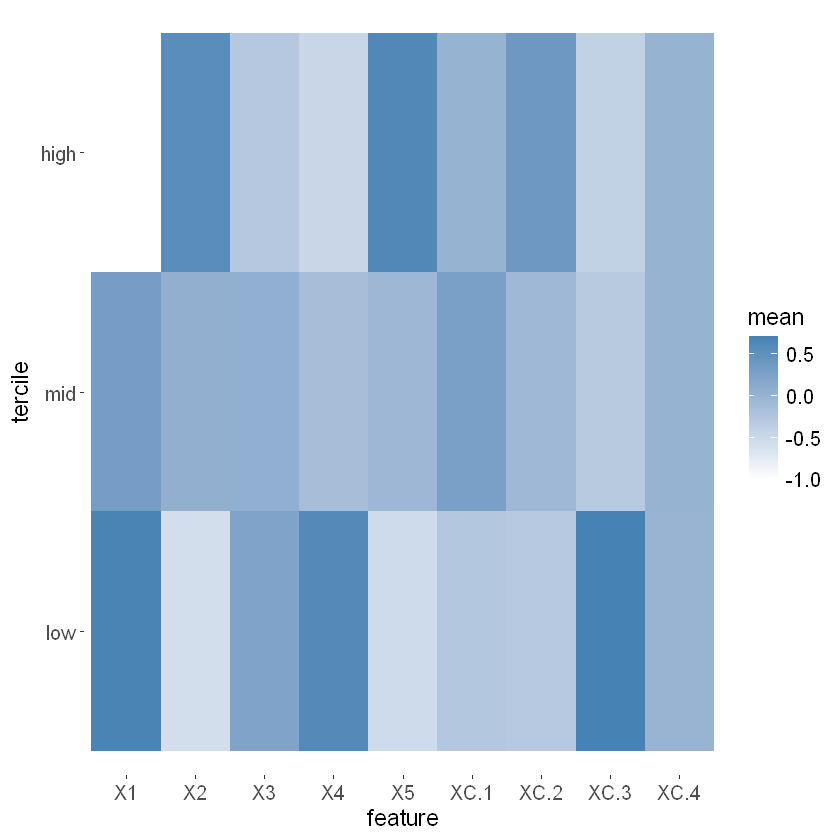

In [48]:
# Visualize school-level covariates by treatment heterogeneity
#

school.X.std = scale(school.X)
school.tercile = cut(school.pred,
                     breaks = c(-Inf, quantile(school.pred, c(1/3, 2/3)), Inf))
school.tercile.mat = model.matrix(~ school.tercile + 0)
school.means = diag(1 / colSums(school.tercile.mat)) %*% t(school.tercile.mat) %*% as.matrix(school.X.std)

MM = max(abs(school.means))
HC = heat.colors(21)
school.col = apply(school.means, 1:2, function(aa) HC[1 + round(20 * (0.5 + aa))])

DF.plot = data.frame(tercile=rep(factor(1:3, labels=c("low", "mid", "high")), 9), mean=as.numeric(school.means),
                     feature = factor(rbind(colnames(school.X), colnames(school.X), colnames(school.X))))

ggplot(data = DF.plot, aes(x = feature, y = tercile, fill = mean)) +
    geom_tile() + scale_fill_gradient(low = "white", high = "steelblue") +
    theme(axis.text = element_text(size=12), axis.title = element_text(size=14),
          legend.title = element_text(size=14), legend.text = element_text(size=12)) +
    theme(panel.background = element_blank())
ggsave("tercile_plot.pdf", width = 8, height = 4.5, dpi = 120)

mean(school.X$XC.3)
mean(school.X$XC.3[as.numeric(school.tercile) == 1])

This graph show us the difference between the mean of the CATE for each school-level covariate considered in the school-wise estimation. We can see that there is not much hetereginty between the means in all covariates but the X1, where the difference between the low and high group of CATEs. This reminds us that even if it seem to be variability in the effects when we divide by this covariate, there's not enough evidence that controling with the other covariates this effect will remain even when analysing the data at school-level.

### CATE by school

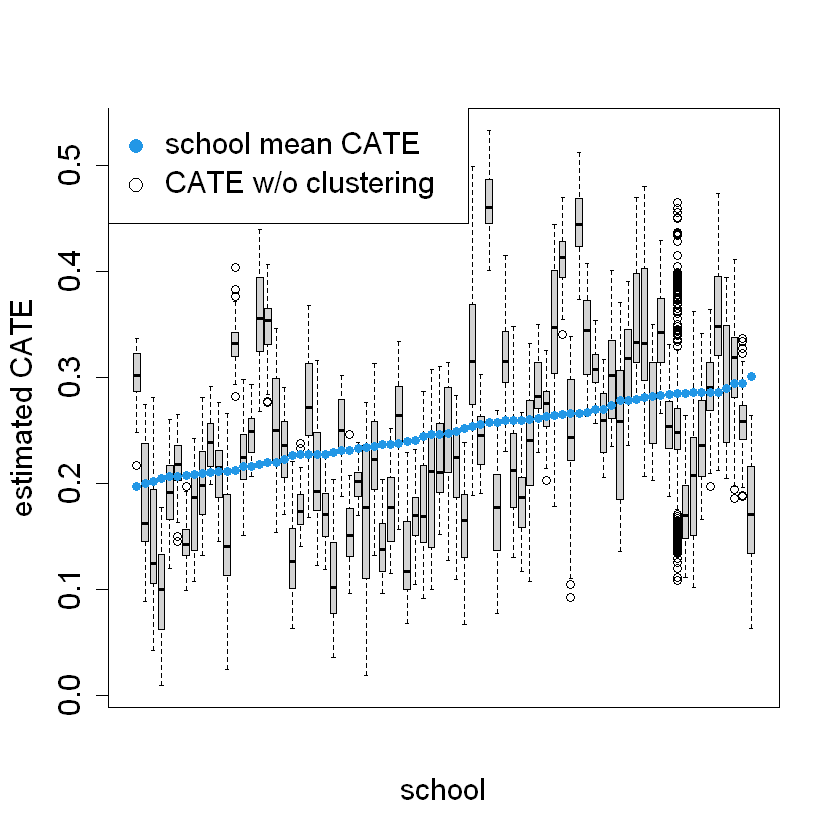

In [49]:
ord = order(order(school.pred))
school.sort = ord[school.id]

pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
boxplot(tau.hat.noclust ~ school.sort, xaxt = "n",
        xlab = "school", ylab = "estimated CATE")
points(1:76, sort(school.pred), col = 4, pch = 16)
legend("topleft", c("school mean CATE", "CATE w/o clustering"), pch = c(16, 1), col = c(4, 1), cex = 1.5)
par = pardef


This graph compares per-student predictions from a non-cluster-robust causal forest to per-school mean treatment effect predictions from a forest trained on per-school responses that takes clustering into account. As seen before. We can see that CATE found in when ignoring clusters is higher and more disperse by school than when considering clusters.